In [205]:
# import libraries pandas, matplotlib, numpy, randam, dateutil.parser
import pandas as pd
data = pd.read_csv("us-states.csv")
import matplotlib.pyplot as plt
import numpy as np
import random
from dateutil.parser import parse as parse_date

In [206]:
# randomly select 5 states in the dataset, save in the list data_state0.
data_state0 = np.random.choice(data.state,5,replace = False)
print(data_state0)

['Connecticut' 'Hawaii' 'Iowa' 'Mississippi' 'Oregon']


In [207]:
# transpose the dataframe for further use.
data_transposed = data.T

In [208]:
# define the function cases_vs_date_of_states(), which is used to plot cases vs dates of selected states data_state0.
def cases_vs_date_of_states(data_state):
    for j in range(0,len(data_state)):
        # create lists DataDate_list, DataCases_list, in order to store the dates and cases of selected states.
        DataDate_list = []
        DataCases_list = []
        for i in range(0,len(data)):
            # using if/else as conditional statement, traverse the whole dataframe：
            # if the state of element is in the data_state0, save the date and cases of this state into two lists DataDate_list and DataCases_list.
            if data_transposed[i]['state'] == data_state[j]:
                DataDate_list.append(data_transposed[i]['date'])
                DataCases_list.append(data_transposed[i]['cases'])
        # using matplotlib.pyplot to draw the overlaid line graphs, one for each selected state.
        # using .xlabel, .ylabel, .title, .legend to set the x axis-label, y-axis label, figure title and uoper left lengend.
        plt.plot(DataDate_list, DataCases_list, label = data_state[j])
        plt.xlabel("Date")
        plt.ylabel("Number of cases")
        plt.title("The cases vs date changes of selected states")
        plt.legend(loc = 'upper left')

['Florida' 'Nebraska' 'Colorado' 'District of Columbia' 'South Dakota'
 'Oregon' 'Nevada' 'New York' 'South Carolina' 'Arizona']


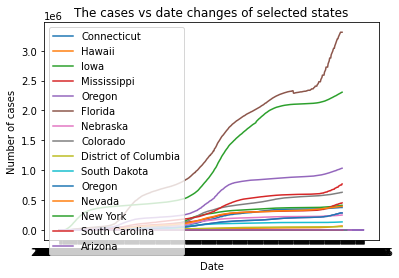

In [209]:
# Tesing code: run the function to see whether it is able to draw a figure based on the needs.
cases_vs_date_of_states(data_state0)

# Testing code: also test the above function by drawing another overlaid line graph of ten different states.
data_state1 = np.random.choice(data.state,10,replace = False)
print(data_state1)
cases_vs_date_of_states(data_state1)

In [210]:
# define the function return_highest_date(), which is used to take the name of a state, and return the date of its highest number of new cases.
def return_highest_date(sel_state):
    # define highest_cases_date as a global variable, so that it could be used in other functions.
    global highest_cases_date
    # create lists sel_state_cases, sel_state_date, daily_cases to save the cases, date and number of daily cases of selected state.
    sel_state_cases = []
    sel_state_date = []
    daily_cases = []
    highest_cases = 0
    # use for loop to traverse the whole dataframe.
    for i in range(0,len(data)):
        # if the state of element is the selected state, save the date and cases of selected state into lists sel_state_cases, sel_state_date.
        if data_transposed[i]['state'] == sel_state:
            sel_state_cases.append(data_transposed[i]['cases'])
            sel_state_date.append(data_transposed[i]['date'])
    # use for loop to calculate daily cases by latter substract former. results are saved into list daily_cases.
    for j in range(1,len(sel_state_cases)):
        daily_cases.append(sel_state_cases[j] - sel_state_cases[j-1])
    # use for loop to find the largest element in the list daily_cases, and save into the variable highest_cases.
    for k in range(0,len(daily_cases)):
        if daily_cases[k] > highest_cases:
            highest_cases = daily_cases[k]
            # the corresponding date was saved into the variable highest_cases_date.
            highest_cases_date = sel_state_date[k+1]
    print(f"For the state {sel_state}, the highest number of new cases is {highest_cases} and the date of highest cases is {highest_cases_date}.")

In [211]:
# test the function with state 'Washington'
return_highest_date('Washington')

# testing code:
# since I use state 'Washington' to test the function return_highest_date(), I define function test_for_return_highest_date1():
def test_for_return_highest_date1():
    # create a list two_cases to save the dates(when highest cases occur and the day before that day) of state Washington.
    two_cases = []
    # use for loop to traverse the whole dataframe.
    for i in range(0,len(data)):
        # if the date is the day before that day, save the number of cases into list two_cases.
        if data_transposed[i]['state'] == 'Washington' and data_transposed[i]['date'] == '2021-08-29':
            two_cases.append(data_transposed[i]['cases'])
    for j in range(0,len(data)):
        # same as above, if the date is the day when highest cases occur, save the number of cases into list two_cases.
        if data_transposed[j]['state'] == 'Washington' and data_transposed[j]['date'] == '2021-08-30':
            two_cases.append(data_transposed[j]['cases'])
    # calculate the number of highest cases by substracting, to see if the result is same as that in the function return_highest_date().
    print(f"The highest number of daily cases is {two_cases[1]-two_cases[0]}.")
test_for_return_highest_date1()


# define function test_for_return_highest_date2(), to see if function return_highest_date() could print the result regardless of which state it is.
def test_for_return_highest_date2():
    # save all the state names into list unique_state.
    unique_state = data.groupby(by=['state'], as_index=False).count()
    # use for loop to traverse the list unique_state. For each state, run function return_highest_date() to see the results.
    for i in range(0,len(unique_state)):
        return_highest_date(unique_state['state'][i])

test_for_return_highest_date2()

For the state Washington, the highest number of new cases is 8346 and the date of highest cases is 2021-08-30.
The highest number of daily cases is 8346.
For the state Alabama, the highest number of new cases is 11142 and the date of highest cases is 2021-08-26.
For the state Alaska, the highest number of new cases is 1148 and the date of highest cases is 2021-08-30.
For the state Arizona, the highest number of new cases is 17222 and the date of highest cases is 2021-01-03.
For the state Arkansas, the highest number of new cases is 4304 and the date of highest cases is 2021-01-01.
For the state California, the highest number of new cases is 64986 and the date of highest cases is 2020-12-26.
For the state Colorado, the highest number of new cases is 6499 and the date of highest cases is 2020-11-13.
For the state Connecticut, the highest number of new cases is 8457 and the date of highest cases is 2020-12-28.
For the state Delaware, the highest number of new cases is 1220 and the date of

In [212]:
# define the function compare_states_highest_cases(), which takes the names of two states and reports which one had its highest number of cases first and how many days separate that one's peak from the other one's peak.
def compare_states_highest_cases(state1,state2):
    # define highest_cases_date as a global variable, so that it could be used in other functions.
    global highest_cases_date
    # run function return_highest_date() to get the dates when highest cases occurs.
    return_highest_date(state1)
    # use parse_date to parse date/time of string type into date type.
    date1 = parse_date(highest_cases_date)
    return_highest_date(state2)
    date2 = parse_date(highest_cases_date)
    # calculate for how many days between these two dates, saved in the variable separate_days.
    separate_days = (date2 - date1).days
    # also calculate for how many months between these two dates, saved in the variable separate_months.
    separate_months = abs(separate_days/60)
    # use if/else as conditional statement, to report which one had its highest number of cases first. also print how many days separate that one's peak from the other one's peak.
    if separate_days > 0:
        print(f"For states {state1} and {state2}, {state1} had its highest number of cases about {separate_months:.1f} months ({separate_days} days) before {state2}.")
    elif separate_days < 0:
        separate_days = abs(separate_days)
        print(f"For states {state1} and {state2}, {state2} had its highest number of cases about {separate_months:.1f} months ({separate_days} days) before {state1}.")
    else:
        print(f"For states {state1} and {state2}, they had their highest number of cases on the same date.")

compare_states_highest_cases('Washington','Virginia')

For the state Washington, the highest number of new cases is 8346 and the date of highest cases is 2021-08-30.
For the state Virginia, the highest number of new cases is 9914 and the date of highest cases is 2021-01-17.
For states Washington and Virginia, Virginia had its highest number of cases about 3.8 months (225 days) before Washington.


In [215]:
# testing code:
# define the function test_for_compare_states_highest_cases(), to see if function compare_states_highest_cases() could make comparison between each two states.
def test_for_compare_states_highest_cases():
    # save all the state names into list unique_state.
    unique_state = data.groupby(by=['state'], as_index=False).count()
    # use for loop to run function compare_states_highest_cases() between each two states.
    for i in range(0,len(unique_state)):
        j = len(unique_state) - i - 1
        while (j > 0):
            compare_states_highest_cases(unique_state['state'][i],unique_state['state'][j])
            j = j - 1
            print(unique_state['state'][j])
        if j == 0: break
        
test_for_compare_states_highest_cases()

For the state Alabama, the highest number of new cases is 11142 and the date of highest cases is 2021-08-26.
For the state Wyoming, the highest number of new cases is 1289 and the date of highest cases is 2021-08-30.
For states Alabama and Wyoming, Alabama had its highest number of cases about 0.1 months (4 days) before Wyoming.
Wisconsin
For the state Alabama, the highest number of new cases is 11142 and the date of highest cases is 2021-08-26.
For the state Wisconsin, the highest number of new cases is 8510 and the date of highest cases is 2020-11-18.
For states Alabama and Wisconsin, Wisconsin had its highest number of cases about 4.7 months (281 days) before Alabama.
West Virginia
For the state Alabama, the highest number of new cases is 11142 and the date of highest cases is 2021-08-26.
For the state West Virginia, the highest number of new cases is 2837 and the date of highest cases is 2021-08-29.
For states Alabama and West Virginia, Alabama had its highest number of cases about